  # **Task**

  Perform an exploratory data analysis (EDA) on the supermarket.csv dataset, including data loading, preprocessing, analysis of branch and city performance, product line and gender preferences, time-based sales, and payment methods, then summarize the key findings and ask about proceeding with statistical or machine learning approaches.

# 🛒 Supermarket Satış Verileri: Keşifçi Veri Analizi (EDA)

## 📌 Proje Amacı
Bu projenin temel amacı, `supermarket.csv` veri setini kullanarak perakende satış performansını etkileyen faktörleri derinlemesine incelemektir. Veri setindeki desenleri ortaya çıkararak şube performansı, müşteri tercihleri ve satış trendleri hakkında içgörüler elde edilmesi hedeflenmektedir.

## 📊 Analiz Kapsamı
Bu çalışma kapsamında aşağıdaki adımlar izlenecektir:

1.  **Veri Hazırlığı:** Veri setinin yüklenmesi, veri tiplerinin kontrolü ve ön işleme (preprocessing) adımları.
2.  **Konumsal Performans Analizi:** Şehir ve şube bazında satış dağılımlarının incelenmesi.
3.  **Ürün ve Müşteri Segmentasyonu:** Ürün hatları (product line) ve cinsiyet bazlı alışveriş tercihlerinin analizi.
4.  **Zaman Analizi:** Satışların zamana (saat, gün) göre değişiminin ve yoğunluk haritasının çıkarılması.
5.  **Ödeme Davranışları:** Müşterilerin tercih ettiği ödeme yöntemlerinin incelenmesi.

## 🚀 Hedeflenen Çıktı
Analiz sonucunda elde edilen temel bulgular özetlenecek ve verinin istatistiksel testler veya Makine Öğrenmesi (Örn: Satış Tahmini veya Müşteri Kümeleme) modellerine uygunluğu değerlendirilecektir.

## 🛠️ 1. Veri Yükleme ve İlk Bakış

### Analiz Öncesi Hazırlık
Veri analizi sürecinin ilk adımı olarak, yapılandırılmış veriyi (`supermarket.csv`) analiz ortamına aktarıyoruz. Bu aşamada temel amacımız:
* Kütüphane bağımlılıklarını tanımlamak,
* Veri setinin genel yapısını (sütunlar, gözlemler) görselleştirmek,
* Veri tiplerinin beklentilerimizle uyuşup uyuşmadığını kontrol etmektir.



In [24]:
import pandas as pd

In [25]:
df=pd.read_csv("/content/supermarket (1).csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## 🧹 2. Veri Ön İşleme ve Özellik Mühendisliği

### Veri Kalite Kontrolü ve Dönüştürme
Ham veri seti, zaman bazlı analizler yapabilmek için her zaman optimize edilmiş halde gelmez. Bu aşamada, verinin yapısal bütünlüğünü sağlamak ve zaman serisi analizlerine temel oluşturmak için aşağıdaki işlemleri gerçekleştiriyoruz:

* **Veri Tipi Denetimi:** Sayısal ve kategorik alanların doğru formatta (int, float, object) olup olmadığının tespiti.
* **Eksik Veri (Missing Value) Analizi:** Analiz sonuçlarını saptırabilecek boş değerlerin kontrolü.
* **Tip Dönüşümü:** `Date` ve `Time` sütunlarının metin formatından (string), üzerinde matematiksel işlem yapılabilen `datetime` nesnelerine dönüştürülmesi.
* **Özellik Mühendisliği (Feature Engineering):** Günün saati gibi, satış trendlerini daha iyi açıklayabilecek yeni değişkenlerin türetilmesi.

In [26]:
print("DataFrame Information:")
df.info()

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract hour from 'Time' column and create a new 'Hour' column
df['Hour'] = pd.to_datetime(df['Time']).dt.hour

print("\nDataFrame after 'Date' and 'Hour' processing:")
df[['Date', 'Time', 'Hour']].head()

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gr

/tmp/ipython-input-564751710.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour


,Date,Time,Hour
0,2019-01-05,13:08,13
1,2019-03-08,10:29,10
2,2019-03-03,13:23,13
3,2019-01-27,20:33,20
4,2019-02-08,10:37,10


# 🛠️ Optimization & Warning Handling / Optimizasyon ve Uyarı Yönetimi
# **English**
The previous approach triggered a UserWarning because pandas had to infer the time format for each row, which is computationally expensive and prone to errors. By explicitly providing the %H:%M format, we ensure a more robust, faster conversion and follow best practices for clean, warning-free code.

# Türkçe
Önceki yaklaşım, pandas'ın zaman formatını her satır için tahmin etmeye çalışması nedeniyle bir UserWarning tetikledi. Bu durum hem işlem maliyetini artırır hem de hatalara davetiye çıkarır. %H:%M formatını açıkça belirterek, daha sağlam ve hızlı bir dönüşüm sağlıyoruz; aynı zamanda temiz ve uyarısız kod yazma standartlarını takip ediyoruz.

In [27]:
print("DataFrame Information:")
df.info()

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract hour from 'Time' column and create a new 'Hour' column
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour

print("\nDataFrame after 'Date' and 'Hour' processing:")
df[['Date', 'Time', 'Hour']].head()

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment     

,Date,Time,Hour
0,2019-01-05,13:08,13
1,2019-03-08,10:29,10
2,2019-03-03,13:23,13
3,2019-01-27,20:33,20
4,2019-02-08,10:37,10


#📊 3. Branch and City Performance Analysis / Şube ve Şehir Performans Analizi
English Reasoning
To identify the top-performing locations, we need to aggregate the total revenue (Total) by Branch and City. Grouping the data allows us to compare the financial contribution of each location. Visualizing these results with bar charts will make the performance gaps more apparent and actionable for stakeholders.

Türkçe Açıklama
En yüksek performans gösteren lokasyonları belirlemek için toplam ciroyu (Total), Branch (Şube) ve City (Şehir) bazında gruplandırarak topluyoruz. Bu gruplandırma, her bir lokasyonun finansal katkısını kıyaslamamıza olanak tanır. Elde edilen sonuçları sütun grafikleriyle görselleştirmek, performans farklarını paydaşlar için daha belirgin ve aksiyon alınabilir hale getirecektir.

In [28]:
branch_total_revenue = df.groupby('Branch')['Total'].sum().sort_values(ascending=False)
city_total_revenue = df.groupby('City')['Total'].sum().sort_values(ascending=False)

print("Total Revenue by Branch:")
print(branch_total_revenue)
print("\nTotal Revenue by City:")
print(city_total_revenue)

Total Revenue by Branch:
Branch
C    110568.7065
A    106200.3705
B    106197.6720
Name: Total, dtype: float64

Total Revenue by City:
City
Naypyitaw    110568.7065
Yangon       106200.3705
Mandalay     106197.6720
Name: Total, dtype: float64


/tmp/ipython-input-2718933383.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=branch_total_revenue.index, y=branch_total_revenue.values, palette='viridis')
/tmp/ipython-input-2718933383.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_total_revenue.index, y=city_total_revenue.values, palette='plasma')


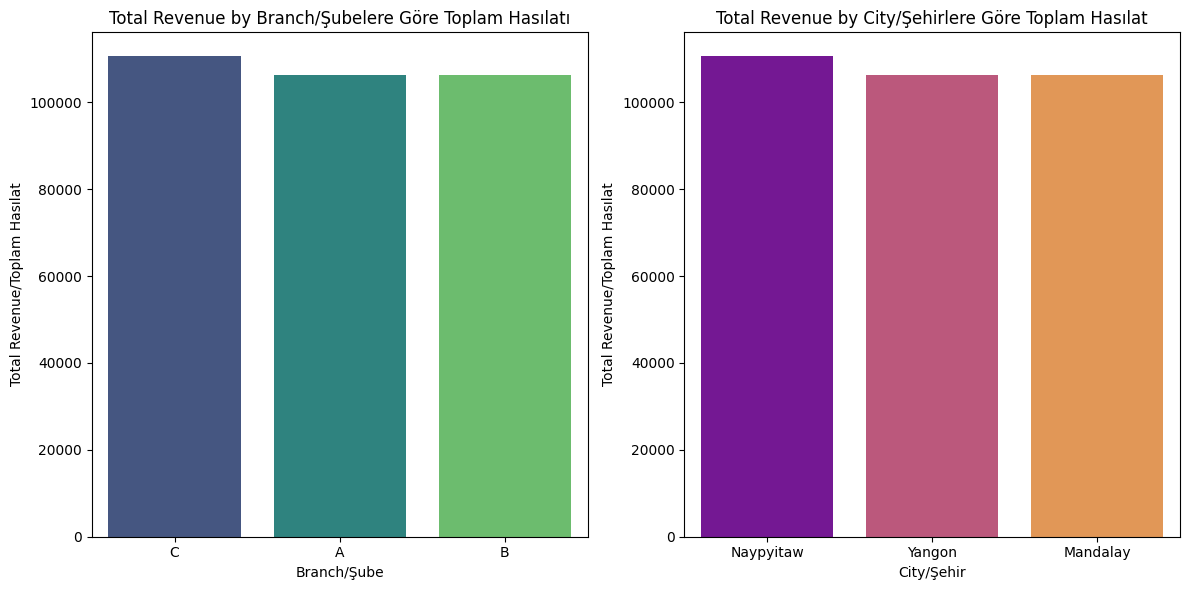

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=branch_total_revenue.index, y=branch_total_revenue.values, palette='viridis')
plt.title('Total Revenue by Branch/Şubelere Göre Toplam Hasılatı')
plt.xlabel('Branch/Şube')
plt.ylabel('Total Revenue/Toplam Hasılat')

plt.subplot(1, 2, 2)
sns.barplot(x=city_total_revenue.index, y=city_total_revenue.values, palette='plasma')
plt.title('Total Revenue by City/Şehirlere Göre Toplam Hasılat')
plt.xlabel('City/Şehir')
plt.ylabel('Total Revenue/Toplam Hasılat')

plt.tight_layout()
plt.show()

Ürün Hattı ve Cinsiyet Tercihi analizi, pazarlama stratejileri geliştirmek için en kritik aşamalardan biridir. Burada "Hangi ürün daha çok kazandırıyor?" ve "Kime ne satıyoruz?" sorularına yanıt arıyoruz.

İşte bu bölüm için hazırladığım profesyonel, çift dilli yapı ve kod analizi:

🛍️ 4. Product Line and Gender Preference Analysis / Ürün Hattı ve Cinsiyet Tercihi Analizi
English Reasoning
To identify the most profitable categories and understand customer behavior, we perform a two-step analysis. First, we aggregate gross income by Product line to see which category contributes most to the bottom line. Second, we segment this income by Gender to uncover purchasing patterns. Visualizing this with a grouped bar chart allows us to see if certain categories are more "gender-skewed," which is vital for targeted marketing.

Türkçe Açıklama
En karlı kategorileri belirlemek ve müşteri davranışlarını anlamak için iki adımlı bir analiz gerçekleştiriyoruz. İlk olarak, hangi kategorinin genel karlılığa en çok katkıda bulunduğunu görmek için gross income (brüt gelir) değerini Product line (Ürün hattı) bazında topluyoruz. İkinci olarak, satın alma kalıplarını ortaya çıkarmak için bu geliri Gender (Cinsiyet) bazında segmente ediyoruz. Bu veriyi gruplandırılmış sütun grafikleriyle görselleştirmek, belirli kategorilerin cinsiyete göre eğilim gösterip göstermediğini görmemizi sağlar; bu da hedef odaklı pazarlama için hayati önem taşır.

In [30]:
product_line_gross_income = df.groupby('Product line')['gross income'].sum().sort_values(ascending=False)
gender_product_line_gross_income = df.groupby(['Gender', 'Product line'])['gross income'].sum().unstack().fillna(0)

print("Total Gross Income by Product Line:")
print(product_line_gross_income)
print(
"\nTotal Gross Income by Gender and Product Line:")
print(gender_product_line_gross_income)

Total Gross Income by Product Line:
Product line
Food and beverages        2673.5640
Sports and travel         2624.8965
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Home and lifestyle        2564.8530
Health and beauty         2342.5590
Name: gross income, dtype: float64

Total Gross Income by Gender and Product Line:
Product line  Electronic accessories  Fashion accessories  Food and beverages  \
Gender                                                                          
Female                     1290.5725             1449.400           1579.5675   
Male                       1296.9290             1136.595           1093.9965   

Product line  Health and beauty  Home and lifestyle  Sports and travel  
Gender                                                                  
Female                 883.8565           1430.3275          1360.7010  
Male                  1458.7025           1134.5255          1264.1955  


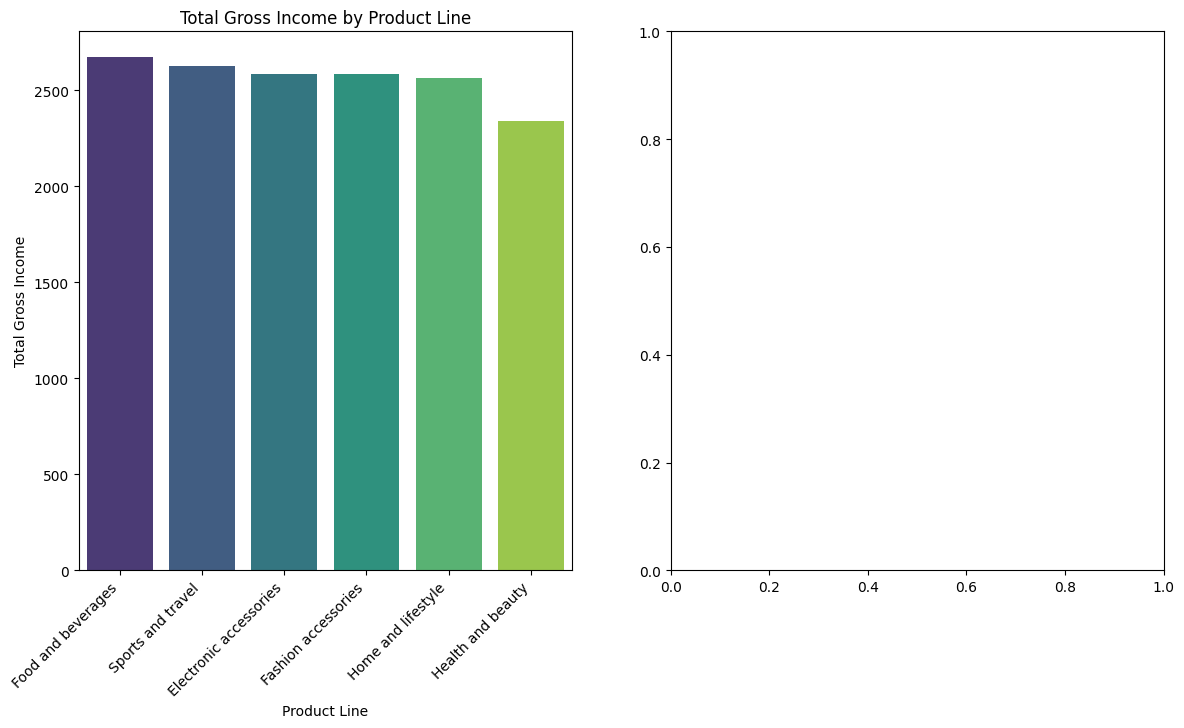

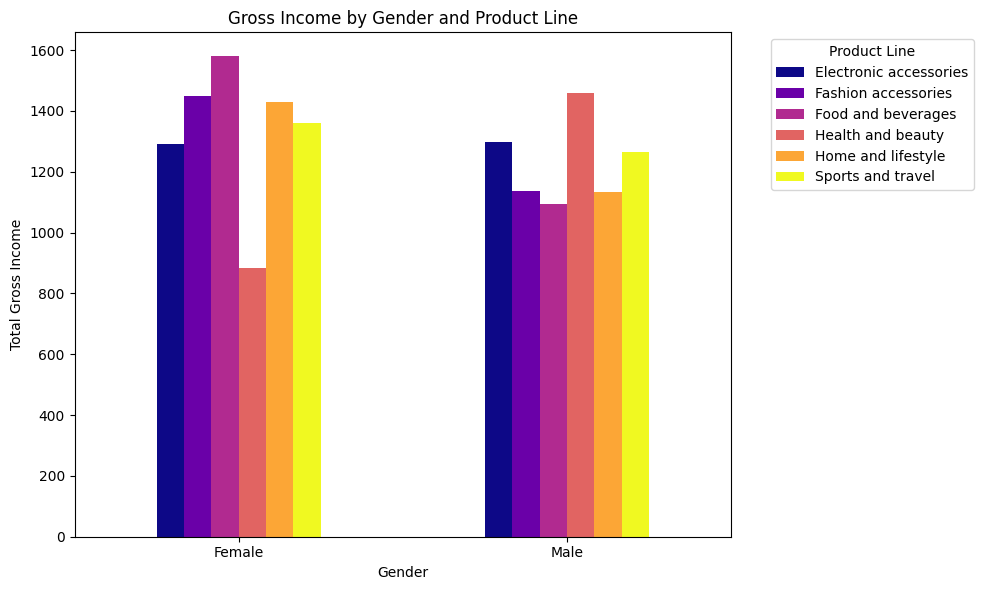

In [31]:
plt.figure(figsize=(14, 7))

# Plot 1: Total Gross Income by Product Line
plt.subplot(1, 2, 1)
sns.barplot(x=product_line_gross_income.index, y=product_line_gross_income.values, palette='viridis', hue=product_line_gross_income.index, legend=False)
plt.title('Total Gross Income by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Gross Income')
plt.xticks(rotation=45, ha='right')

# Plot 2: Gross Income by Gender and Product Line
plt.subplot(1, 2, 2)
gender_product_line_gross_income.plot(kind='bar', figsize=(10, 6), colormap='plasma')
plt.title('Gross Income by Gender and Product Line')
plt.xlabel('Gender')
plt.ylabel('Total Gross Income')
plt.xticks(rotation=0)
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

#⏰ 5. Time-Based Sales Analysis / Zaman Bazlı Satış Analizi
**English Reasoning**

To identify peak shopping hours, we extract the hour information from the Time column. Aggregating total sales by the hour allows us to pinpoint periods of high customer traffic. This analysis is crucial for operational efficiency, such as optimizing staff shifts and scheduling stock replenishment during slower periods.

**Türkçe Açıklama**

Alışverişin zirve yaptığı saatleri belirlemek için Time sütunundan saat bilgisini çıkarıyoruz. Toplam satışları saat bazında bir araya getirmek, müşteri trafiğinin en yoğun olduğu zaman dilimlerini tam olarak tespit etmemizi sağlar. Bu analiz; personel vardiyalarının optimize edilmesi ve stok yenileme işlemlerinin sakin saatlere planlanması gibi operasyonel verimlilik kararları için kritik öneme sahiptir.

Total Sales by Hour (sorted descending):
Hour
19    39699.5130
13    34723.2270
10    31421.4810
15    31179.5085
14    30828.3990
11    30377.3295
12    26065.8825
18    26030.3400
16    25226.3235
17    24445.2180
20    22969.5270
Name: Total, dtype: float64
****************************************************************************************************
Total Sales by Hour (sorted descending):


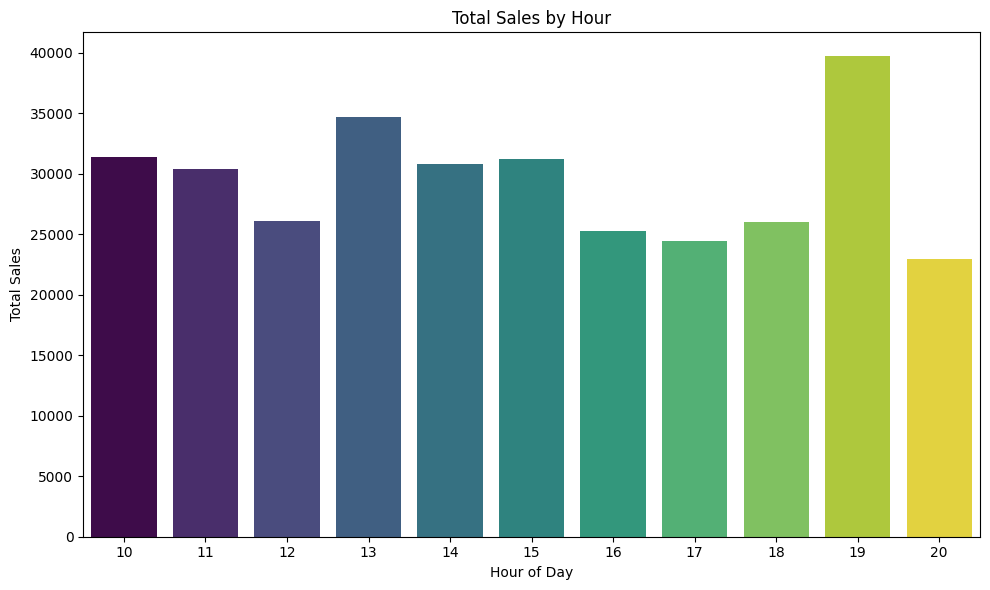

In [32]:
hourly_total_sales = df.groupby('Hour')['Total'].sum().sort_values(ascending=False)

print("Total Sales by Hour (sorted descending):")
print(hourly_total_sales)
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_total_sales.index, y=hourly_total_sales.values, palette='viridis', hue=hourly_total_sales.index, legend=False)
print("*"*100)
print("Total Sales by Hour (sorted descending):")

plt.title('Total Sales by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#💳 6. Payment Methods Analysis / Ödeme Yöntemleri Analizi
English

The choice of payment method can vary significantly based on branch location and customer demographics. By analyzing the frequency of each payment method across different branches, we can identify local consumer behaviors. Visualizing this data with a stacked or grouped bar chart helps us understand whether a specific branch should prioritize digital payment infrastructure or cash management services.

Türkçe Açıklama

Ödeme yöntemi tercihleri, şube lokasyonuna ve müşteri demografisine göre önemli ölçüde farklılık gösterebilir. Her bir ödeme yönteminin farklı şubelerdeki kullanım sıklığını analiz ederek yerel tüketici davranışlarını tanımlayabiliriz. Bu veriyi gruplandırılmış bir sütun grafiği ile görselleştirmek, hangi şubenin dijital ödeme altyapısına veya nakit yönetimi hizmetlerine öncelik vermesi gerektiğini anlamamıza yardımcı olur.

Payment Method Popularity by Branch:
Payment  Cash  Credit card  Ewallet
Branch                             
A         110          104      126
B         110          109      113
C         124           98      106
****************************************************************************************************


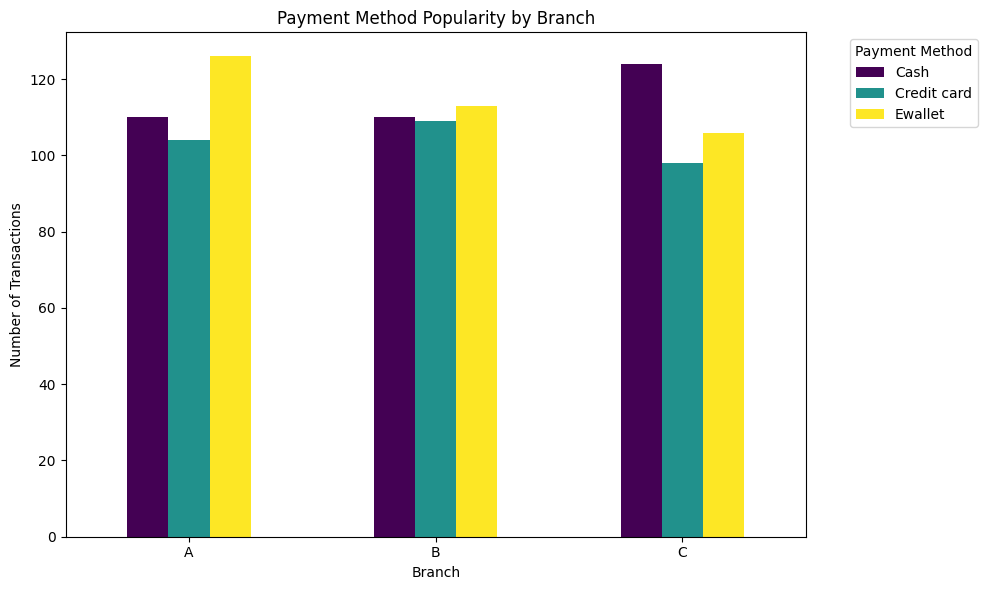

In [33]:
payment_method_by_branch = df.groupby(['Branch', 'Payment']).size().unstack(fill_value=0)

print("Payment Method Popularity by Branch:")
print(payment_method_by_branch)
print("*"*100)
payment_method_by_branch.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Payment Method Popularity by Branch')
plt.xlabel('Branch')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#📝 7. Final Summary & Key Insights / Sonuç Özeti ve Temel Bulgular
English Version
Key Findings:

**Data Integrity**: The dataset is robust with 1,000 entries and zero missing values, ensuring high reliability for our conclusions.

**Geographical Leaders**: Branch C (Naypyitaw) leads the revenue board (~$110,568), though the competition is tight across all regions.

**Top Categories**: "Food and beverages" and "Sports and travel" are the primary revenue drivers.

**Gender Nuances**: Distinct preferences were observed; females lean towards Lifestyle and Fashion, while males dominate Health and Electronics.

**Prime Time**: Customer activity peaks at 10 AM, 1 PM, and 7 PM.

**Payment Trends**: Digital wallets are gaining ground in Branch A and B, while Branch C remains cash-dominant.

#Strategic Recommendations:

Operational Efficiency: Align staff shifts with the identified peak hours (especially the 7 PM rush).

Targeted Marketing: Develop gender-specific promotions for the top categories in their respective branches.

Türkçe Versiyon
Temel Bulgular:

Veri Bütünlüğü: 1.000 satırlık veri setinde eksik değer bulunmaması, analiz sonuçlarımızın güvenilirliğini artırmaktadır.

Bölgesel Liderler: Şube C (Naypyitaw) yaklaşık 110.568 $ ile ciro lideridir, ancak tüm bölgeler arasında rekabet oldukça yakındır.

En Çok Kazandıranlar: "Gıda ve İçecek" ile "Spor ve Seyahat" kategorileri ana gelir kaynağıdır.

Cinsiyet Eğilimleri: Belirgin tercihler saptanmıştır; kadınlar Yaşam Tarzı ve Moda'ya yönelirken, erkekler Sağlık ve Elektronik kategorilerinde daha fazla harcama yapmaktadır.

Zirve Saatler: Müşteri trafiği saat 10:00, 13:00 ve 19:00'da en yüksek seviyeye ulaşmaktadır.

Ödeme Tercihleri: A ve B şubelerinde E-Cüzdan kullanımı yaygınlaşırken, C şubesinde nakit kullanımı halen baskındır.

#Stratejik Öneriler:

Operasyonel Verimlilik: Personel vardiyalarını belirlenen yoğun saatlere (özellikle 19:00 yoğunluğuna) göre optimize edin.

Hedefli Pazarlama: İlgili şubelerdeki popüler kategoriler için cinsiyet odaklı kampanyalar geliştirin.

🔍 Next Steps: Strategic Decision / Sonraki Adımlar: Stratejik Karar
Analizimizi bir üst seviyeye taşımak için önümüzde iki profesyonel yol var:

Advanced Statistical Analysis (İleri İstatistiksel Analiz):

Şubeler arasındaki ciro farkının şans eseri mi yoksa istatistiksel olarak anlamlı mı olduğunu anlamak için ANOVA testi yapabiliriz.

Cinsiyet ve ödeme yöntemi arasındaki ilişkiyi doğrulamak için Ki-Kare (Chi-Square) testi uygulayabiliriz.

Machine Learning (Makine Öğrenmesi):

Sales Forecasting: Gelecek dönem satışlarını tahmin eden bir regresyon modeli.

Customer Segmentation: Müşterileri alışveriş alışkanlıklarına göre gruplayan (Clustering) bir model.